In [1]:
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
proto = "C:\\Users\\GLohi\\COURSE_PROJECT\\colorization_deploy_v2.prototxt"
weights = "C:\\Users\\GLohi\\COURSE_PROJECT\\colorization_release_v2.caffemodel"

In [3]:
pts_in_hull = np.load("C:\\Users\\\GLohi\\COURSE_PROJECT\\pts_in_hull.npy")
pts_in_hull = pts_in_hull.transpose().reshape(2, 313, 1, 1).astype(np.float32)

In [4]:
net = cv2.dnn.readNetFromCaffe(proto, weights)


In [5]:
net.getLayer(net.getLayerId('class8_ab')).blobs = [pts_in_hull]

In [6]:
net.getLayerNames()

('conv1_1',
 'relu1_1',
 'conv1_2',
 'relu1_2',
 'conv1_2norm',
 'conv2_1',
 'relu2_1',
 'conv2_2',
 'relu2_2',
 'conv2_2norm',
 'conv3_1',
 'relu3_1',
 'conv3_2',
 'relu3_2',
 'conv3_3',
 'relu3_3',
 'conv3_3norm',
 'conv4_1',
 'relu4_1',
 'conv4_2',
 'relu4_2',
 'conv4_3',
 'relu4_3',
 'conv4_3norm',
 'conv5_1',
 'relu5_1',
 'conv5_2',
 'relu5_2',
 'conv5_3',
 'relu5_3',
 'conv5_3norm',
 'conv6_1',
 'relu6_1',
 'conv6_2',
 'relu6_2',
 'conv6_3',
 'relu6_3',
 'conv6_3norm',
 'conv7_1',
 'relu7_1',
 'conv7_2',
 'relu7_2',
 'conv7_3',
 'relu7_3',
 'conv7_3norm',
 'conv8_1',
 'relu8_1',
 'conv8_2',
 'relu8_2',
 'conv8_3',
 'relu8_3',
 'conv8_313',
 'conv8_313_rh',
 'class8_313_rh',
 'class8_ab',
 'Silence')

In [7]:
net.getLayerNames()

('conv1_1',
 'relu1_1',
 'conv1_2',
 'relu1_2',
 'conv1_2norm',
 'conv2_1',
 'relu2_1',
 'conv2_2',
 'relu2_2',
 'conv2_2norm',
 'conv3_1',
 'relu3_1',
 'conv3_2',
 'relu3_2',
 'conv3_3',
 'relu3_3',
 'conv3_3norm',
 'conv4_1',
 'relu4_1',
 'conv4_2',
 'relu4_2',
 'conv4_3',
 'relu4_3',
 'conv4_3norm',
 'conv5_1',
 'relu5_1',
 'conv5_2',
 'relu5_2',
 'conv5_3',
 'relu5_3',
 'conv5_3norm',
 'conv6_1',
 'relu6_1',
 'conv6_2',
 'relu6_2',
 'conv6_3',
 'relu6_3',
 'conv6_3norm',
 'conv7_1',
 'relu7_1',
 'conv7_2',
 'relu7_2',
 'conv7_3',
 'relu7_3',
 'conv7_3norm',
 'conv8_1',
 'relu8_1',
 'conv8_2',
 'relu8_2',
 'conv8_3',
 'relu8_3',
 'conv8_313',
 'conv8_313_rh',
 'class8_313_rh',
 'class8_ab',
 'Silence')

In [8]:
net.getLayer(net.getLayerId('conv8_313_rh')).blobs = [np.full((1, 313), 2.606, np.float32)]

In [9]:
img_path = "C:\\Users\\GLohi\\COURSE_PROJECT\\salaar.jpg"

In [10]:

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_input = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)



In [11]:
img_rgb = img.copy()

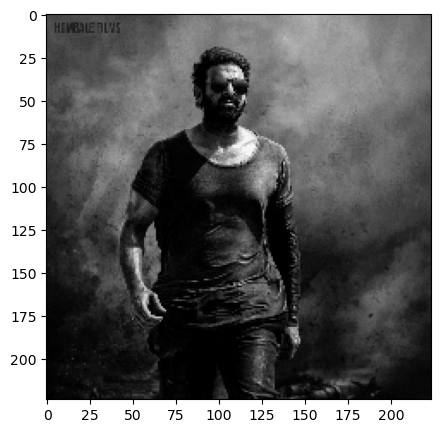

In [12]:
img_rgb = (img_rgb / 255.).astype(np.float32)
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Lab)
img_l = img_lab[:, :, 0]

input_img = cv2.resize(img_l, (224, 224))
input_img -= 50 
plt.figure(figsize=(5,5))
plt.imshow(input_img, cmap='gray')

In [13]:
net.setInput(cv2.dnn.blobFromImage(input_img))


pred = net.forward()[0,:,:,:].transpose((1, 2, 0))
pred_resize = cv2.resize(pred, (img.shape[1], img.shape[0]))

In [14]:
pred_lab = np.concatenate([img_l[:, :, np.newaxis], pred_resize], axis=2)
pred_rgb = cv2.cvtColor(pred_lab, cv2.COLOR_Lab2RGB)
pred_rgb = np.clip(pred_rgb, 0, 1) * 255


pred_rgb = pred_rgb.astype(np.uint8)

(0.0, 1.0, 0.0, 1.0)

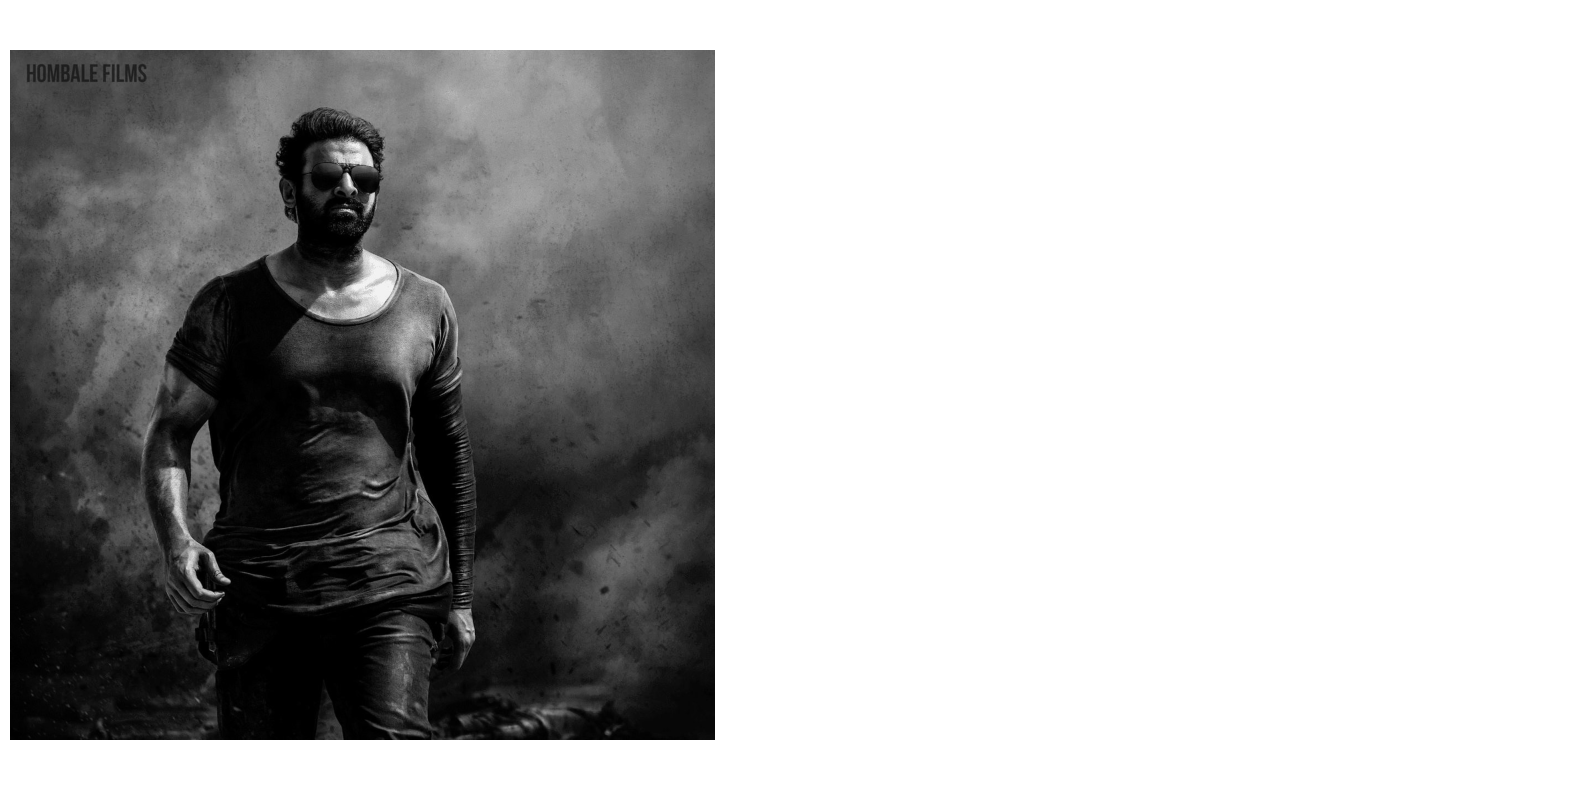

In [15]:
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1, 2, 1).axis('off')


plt.imshow(img_l, cmap='gray')
fig.add_subplot(1, 2, 2).axis('off')


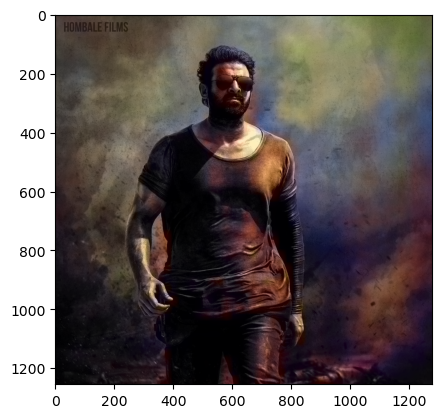

In [16]:
plt.imshow(pred_rgb)

In [17]:
filename, ext = os.path.splitext(img_path)